# 1. Data cleaning 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('shopping_trends.csv')

df.head(5)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [23]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df.fillna({'Age': df['Age'].mean()}, inplace=True)

Series([], dtype: int64)


# 2. Exploratory data analysis 

In [3]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**Insights**:

**Age:**

Phần lớn khách hàng nằm trong độ tuổi từ 31 đến 57, với độ tuổi trung bình là 44.

Có sự biến động đáng kể về độ tuổi của khách hàng, như được chỉ ra bởi độ lệch chuẩn cao là 15,21.

Trong số tất cả khách hàng, 25% có độ tuổi dưới 31, 50% có độ tuổi là 44, và 75% có độ tuổi dưới 57.

**Purchase Amount:**

Số tiền khách hàng chi tiêu dao động từ 20 USD đến 100 USD, với trung bình là 60 USD.

Trong số tất cả khách hàng, 25% chi tiêu dưới 39 USD, 50% chi tiêu 60 USD, và 75% chi tiêu dưới 81 USD.

**Previous Purchase:**

Khách hàng đã thực hiện từ 1 đến 50 giao dịch, với trung bình 25 giao dịch mỗi khách hàng.

25% khách hàng đã thực hiện 13 giao dịch hoặc ít hơn, 50% (trung vị) đã thực hiện 25 giao dịch, và 75% đã thực hiện 38 giao dịch hoặc ít hơn.

In [24]:
print(df['Subscription Status'].value_counts())

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


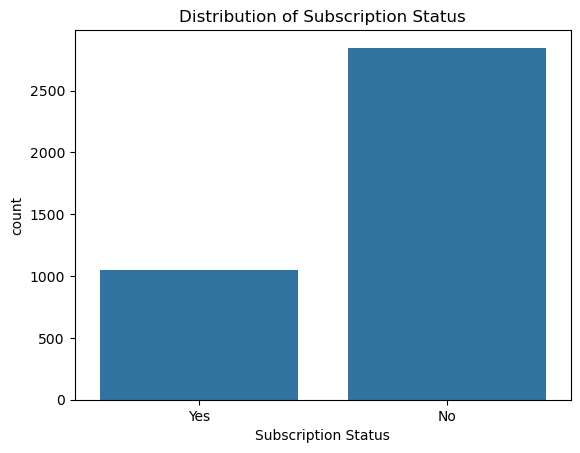

In [25]:


sns.countplot(x='Subscription Status', data=df)
plt.title('Distribution of Subscription Status')
plt.show()


## 2.1. Age and Subscription Status

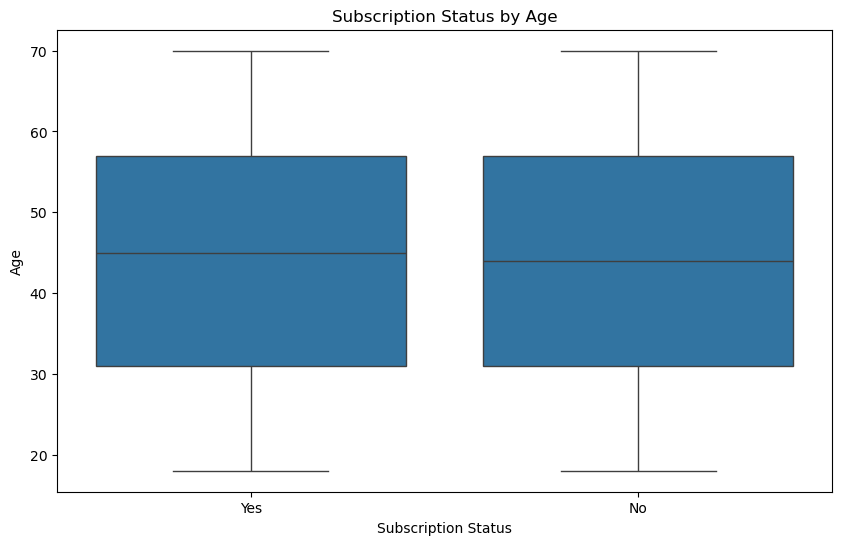

In [3]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Status', y='Age', data=df)
plt.title('Subscription Status by Age')
plt.show()


In [26]:

min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"Min_age: {min_age}")
print(f"Max_age: {max_age}")


Min_age: 18
Max_age: 70


In [27]:
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


df[['Age', 'Age Group']].head()

,Age,Age Group
0,55,56-65
1,19,18-25
2,50,46-55
3,21,18-25
4,45,46-55


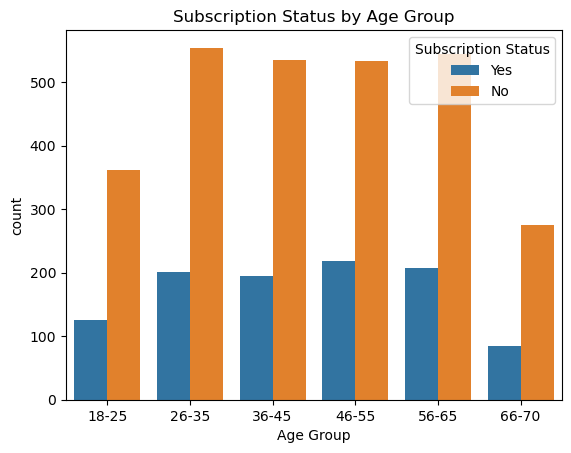

In [28]:

sns.countplot(x='Age Group',hue='Subscription Status',data=df)
plt.title('Subscription Status by Age Group')
plt.show()


**Nhóm tuổi 18-25**: Tỉ lệ khách hàng đăng ký có thể thấp hơn so với các nhóm tuổi lớn hơn, vì nhóm này có thể ít có khả năng tài chính hoặc ít quan tâm đến việc đăng ký dài hạn.

**Nhóm tuổi 26-65**: Đây có thể là nhóm có tỉ lệ đăng ký cao nhất, do nhóm này có thu nhập ổn định và có nhu cầu sử dụng nhiều dịch vụ.

**Nhóm tuổi 66-70**: Nhóm này có thể có tỉ lệ đăng ký thấp hơn vì họ ít có nhu cầu hoặc không quen với các dịch vụ trực tuyến.

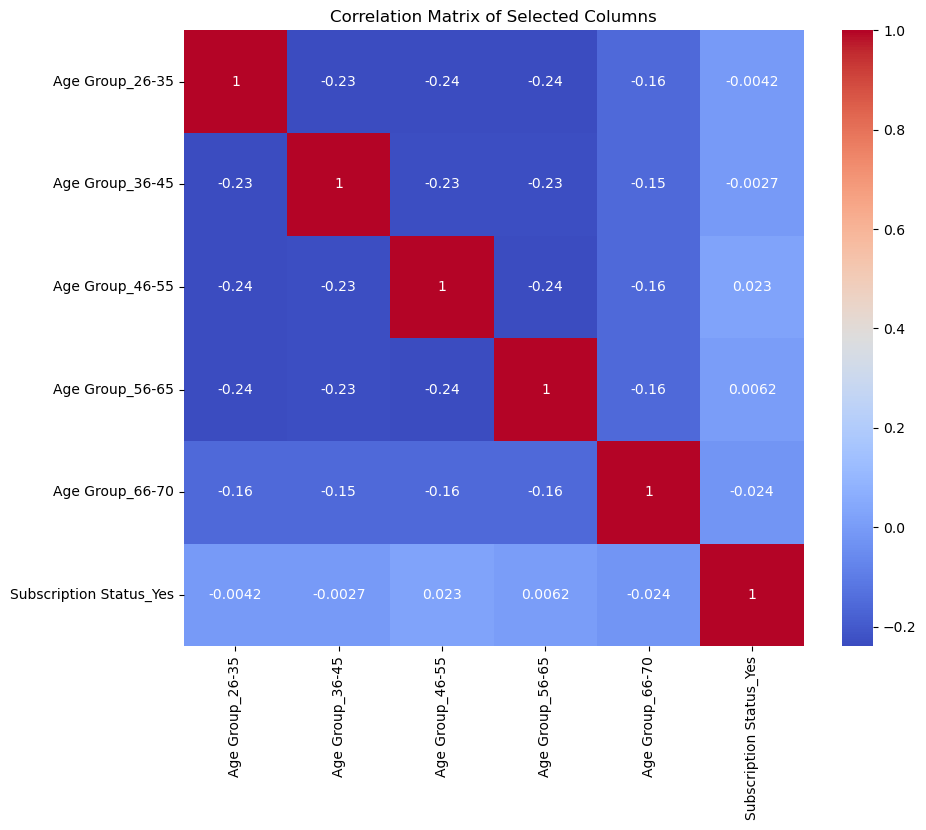

In [6]:
df_selected = df.copy()
important_columns = ['Age Group', 'Subscription Status']
df_selected = df_selected[important_columns]
df_selected = pd.get_dummies(df_selected, drop_first=True)
corr = df_selected.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Columns')
plt.show()


## 2.2 Gender and Subscription

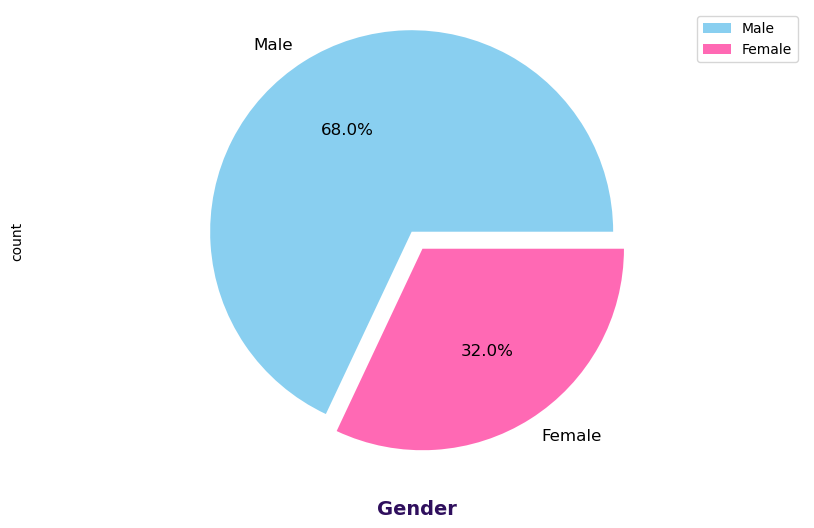

In [14]:
colors = ["#89CFF0", "#FF69B4"]  
plt.figure(figsize = (10, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [15]:

subscription_gender = df.groupby(['Gender', 'Subscription Status']).size().unstack()

subscription_gender_percentage = subscription_gender.div(subscription_gender.sum(axis=1), axis=0) * 100

print(subscription_gender)
print(subscription_gender_percentage)


Subscription Status      No     Yes
Gender                             
Female               1248.0     NaN
Male                 1599.0  1053.0
Subscription Status          No        Yes
Gender                                    
Female               100.000000        NaN
Male                  60.294118  39.705882


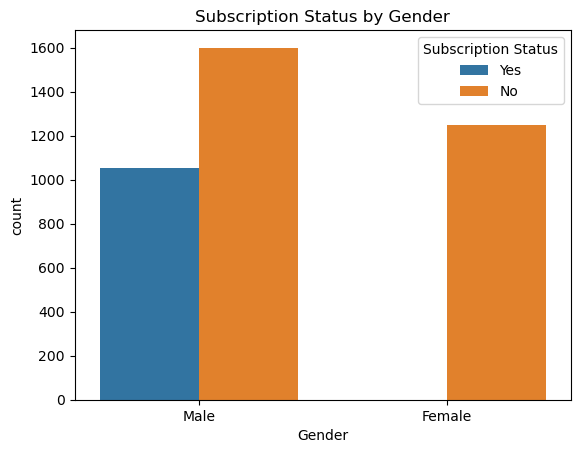

In [7]:

sns.countplot(x='Gender', hue='Subscription Status', data=df)
plt.title('Subscription Status by Gender')
plt.show()


-> 
Dựa trên các kết quả trên, chúng ta có thể rút ra một số kết luận sau:

Giới tính Nữ có vẻ như không có ai trong số họ đã đăng ký. Điều này có thể chỉ ra rằng sản phẩm hoặc dịch vụ đang phân tích không thu hút được phụ nữ hoặc có thể có vấn đề trong cách tiếp cận marketing đến họ.

Giới tính Nam có tỉ lệ đăng ký khá cao, với khoảng 39.71% trong số họ đã chọn đăng ký. Điều này cho thấy rằng có một số yếu tố có thể đang thúc đẩy nam giới tham gia vào dịch vụ hoặc sản phẩm này.

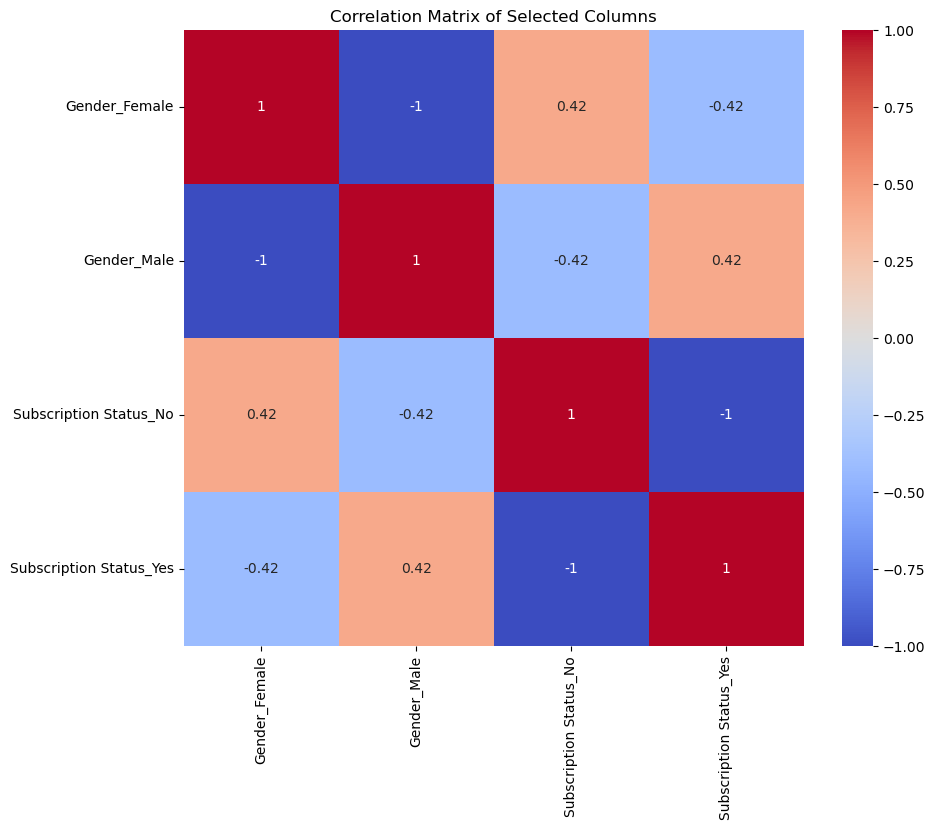

In [10]:
df_selected = df.copy()
important_columns = ['Gender', 'Subscription Status']
df_selected = df_selected[important_columns]
df_selected = pd.get_dummies(df_selected, drop_first=False)
corr = df_selected.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Columns')
plt.show()


**Nguyên nhân**

In [17]:
mean_purchase_by_gender = df.groupby(['Gender', 'Subscription Status'])['Purchase Amount (USD)'].mean()

print("Chi tiêu trung bình theo giới tính và trạng thái đăng ký:")
print(mean_purchase_by_gender)

Chi tiêu trung bình theo giới tính và trạng thái đăng ký:
Gender  Subscription Status
Female  No                     60.249199
Male    No                     59.565353
        Yes                    59.491928
Name: Purchase Amount (USD), dtype: float64


-> Chi Tiêu Trung Bình:

Chi tiêu trung bình của cả hai giới tính cho trạng thái đăng ký "No" (không đăng ký) gần như tương đương, với nữ có chút ưu thế về chi tiêu (60.25 USD so với 59.57 USD của nam).
Tuy nhiên, chi tiêu trung bình của nam cho trạng thái "Yes" (đăng ký) là 59.49 USD, thấp hơn so với cả hai nhóm nữ và nam không đăng ký.

Kết Luận: Mặc dù nam giới có xu hướng chi tiêu nhiều hơn trong trạng thái không đăng ký, chi tiêu của họ lại không đủ cao để tạo ra sự khác biệt lớn khi họ quyết định đăng ký.
Chi tiêu trung bình của nam giới cho trạng thái đăng ký thấp hơn so với nữ và không vượt qua mức chi tiêu của nữ trong trạng thái không đăng ký. 

Điều này có thể cho thấy rằng nam giới có thể không cảm thấy đủ giá trị hoặc lợi ích từ việc đăng ký, mặc dù họ chi tiêu một cách tương tự hoặc gần bằng.

-> Kết quả hiện tại cho thấy rằng mặc dù nam giới có thể chi tiêu gần tương đương với nữ giới, họ vẫn chưa thấy lý do để đăng ký dịch vụ.

In [18]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [19]:
subscription_frequency_analysis = df.groupby(['Gender', 'Frequency of Purchases', 'Subscription Status']).size().unstack(fill_value=0)
subscription_frequency_percentage = subscription_frequency_analysis.div(subscription_frequency_analysis.sum(axis=1), axis=0) * 100

print(subscription_frequency_percentage)


Subscription Status                    No        Yes
Gender Frequency of Purchases                       
Female Annually                100.000000   0.000000
       Bi-Weekly               100.000000   0.000000
       Every 3 Months          100.000000   0.000000
       Fortnightly             100.000000   0.000000
       Monthly                 100.000000   0.000000
       Quarterly               100.000000   0.000000
       Weekly                  100.000000   0.000000
Male   Annually                 58.656331  41.343669
       Bi-Weekly                61.002786  38.997214
       Every 3 Months           61.306533  38.693467
       Fortnightly              59.630607  40.369393
       Monthly                  59.510870  40.489130
       Quarterly                64.467005  35.532995
       Weekly                   57.220708  42.779292


-> Nữ giới (Female):

Tỉ lệ đăng ký của nữ giới cho tất cả các tần suất mua hàng đều là 0% trong nhóm đăng ký (Yes). Điều này cho thấy rằng không có khách hàng nữ nào trong dataset này đã đăng ký sử dụng dịch vụ hoặc sản phẩm.
Nữ giới có vẻ không có hứng thú hoặc không thấy giá trị trong việc đăng ký dịch vụ.

->Nam giới (Male):
Tỉ lệ đăng ký của nam giới thay đổi tùy thuộc vào tần suất mua hàng. Ví dụ:
Với tần suất Annually, khoảng 41.34% nam giới đã đăng ký.
Với tần suất Weekly, tỷ lệ đăng ký đạt tới 42.78%.
Nam giới có sự quan tâm hơn đến việc đăng ký dịch vụ hoặc sản phẩm, với tỷ lệ dao động từ khoảng 35.53% (Quarterly) đến 42.78% (Weekly).


-> Giải thích sự chênh lệch tỉ lệ đăng ký giữa Male và Female:
Sự chênh lệch rõ ràng về sự quan tâm:

- Nữ giới có thể không thấy lợi ích hoặc giá trị trong việc đăng ký, có thể do:
Sản phẩm hoặc dịch vụ không phù hợp với nhu cầu của họ.
Thiếu thông tin hoặc động lực để đăng ký.
- Nam giới có xu hướng đăng ký nhiều hơn:

Nam giới có vẻ cởi mở hơn đối với việc đăng ký, đặc biệt là với các tần suất cao hơn như Weekly hoặc Annually.
Có thể do họ có nhu cầu cao hơn trong việc sử dụng dịch vụ thường xuyên hoặc có ý định mua sắm dài hạn hơn.
Tần suất mua hàng ảnh hưởng đến quyết định đăng ký:

Tỉ lệ đăng ký của nam giới cho thấy rằng khi họ mua sắm với tần suất cao hơn (như Weekly), họ có khả năng đăng ký cao hơn. Điều này có thể liên quan đến hành vi tiêu dùng và thói quen mua sắm của họ.

In [6]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

## 2.3 Category/Item purchased and "Subscription Status" 

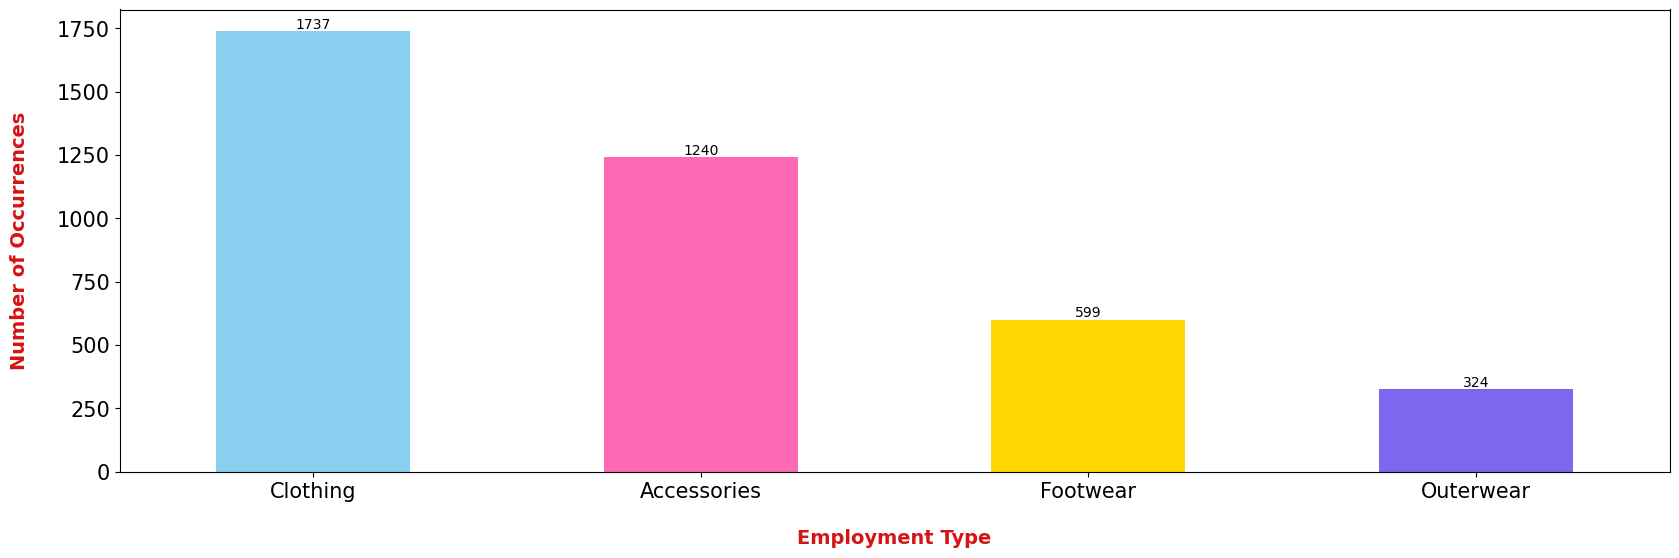

In [3]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE"] 
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                ha = 'center', va = 'bottom', color = 'black')

ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.show()

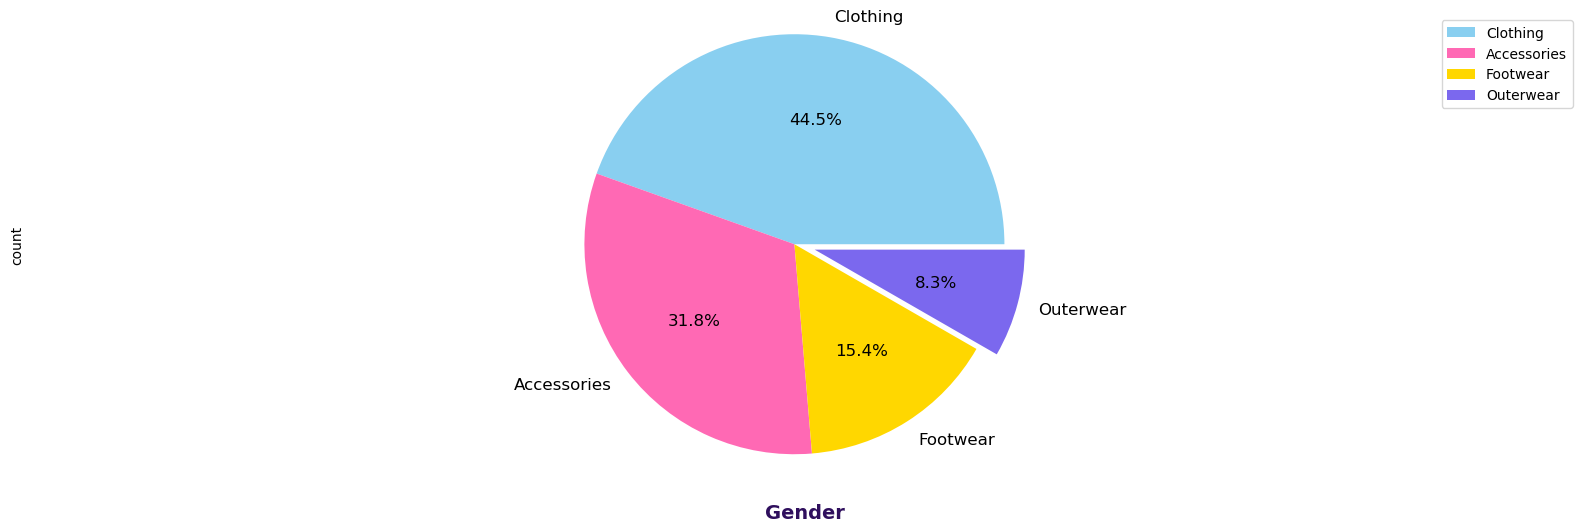

In [8]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [9]:
category_subscription_crosstab = pd.crosstab(df['Category'], df['Subscription Status'])
category_subscription_percentage = category_subscription_crosstab.div(category_subscription_crosstab.sum(axis=1), axis=0) * 100

print(category_subscription_percentage)


Subscription Status         No        Yes
Category                                 
Accessories          73.064516  26.935484
Clothing             73.690271  26.309729
Footwear             71.452421  28.547579
Outerwear            71.913580  28.086420


-> Trong tất cả các danh mục sản phẩm, tỷ lệ khách hàng không đăng ký ("No") luôn cao hơn tỷ lệ đăng ký ("Yes").
Footwear (giày dép) có tỷ lệ khách hàng đăng ký cao nhất (28.55%), trong khi Clothing (quần áo) có tỷ lệ đăng ký thấp nhất (26.31%) mặc dù có số lượng lớn nhất.

Điều này có thể cho thấy rằng các sản phẩm thuộc danh mục Footwear và Outerwear có khả năng thu hút người dùng đăng ký dịch vụ cao hơn so với Accessories và Clothing.

In [10]:
# Lọc ra các Category có tỷ lệ người đăng ký cao (> 28%)
high_influence_categories = category_subscription_percentage[category_subscription_percentage['Yes'] > 28]
print(high_influence_categories)


Subscription Status         No        Yes
Category                                 
Footwear             71.452421  28.547579
Outerwear            71.913580  28.086420


Xem sự ảnh hưởng của "Item Purchase" cùng "Category" đến "Subscription Status"
VD: Footwear

In [11]:
# Lọc dữ liệu chỉ với các sản phẩm thuộc nhóm Footwear
footwear_df = df[df['Category'] == 'Footwear']
footwear_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
10,11,53,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Credit Card,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
62,63,30,Male,Sneakers,Footwear,21,Mississippi,S,Magenta,Spring,3.8,Yes,Credit Card,Free Shipping,Yes,Yes,31,Credit Card,Fortnightly
64,65,65,Male,Boots,Footwear,83,Alabama,S,Green,Fall,4.8,Yes,PayPal,Standard,Yes,Yes,18,Debit Card,Fortnightly


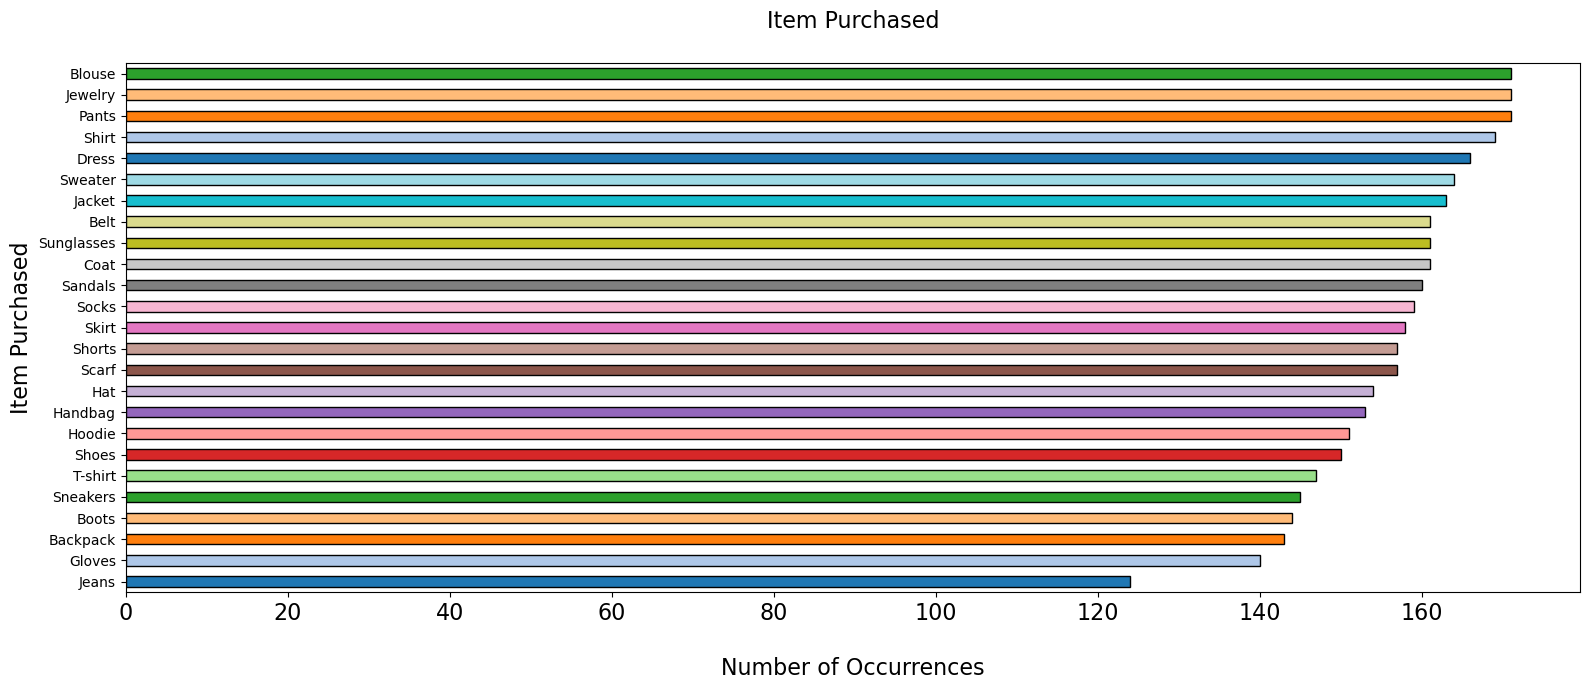

In [12]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [13]:
footwear_subscription_crosstab = pd.crosstab(footwear_df['Item Purchased'], footwear_df['Subscription Status'])
footwear_subscription_percentage = footwear_subscription_crosstab.div(footwear_subscription_crosstab.sum(axis=1), axis=0) * 100

print(footwear_subscription_percentage)

Subscription Status         No        Yes
Item Purchased                           
Boots                70.833333  29.166667
Sandals              75.000000  25.000000
Shoes                70.000000  30.000000
Sneakers             69.655172  30.344828


In [14]:
# Lọc những sản phẩm có tỷ lệ người đăng ký cao (> 30%)
high_influence_footwear = footwear_subscription_percentage[footwear_subscription_percentage['Yes'] >= 30]
print(high_influence_footwear)


Subscription Status         No        Yes
Item Purchased                           
Shoes                70.000000  30.000000
Sneakers             69.655172  30.344828


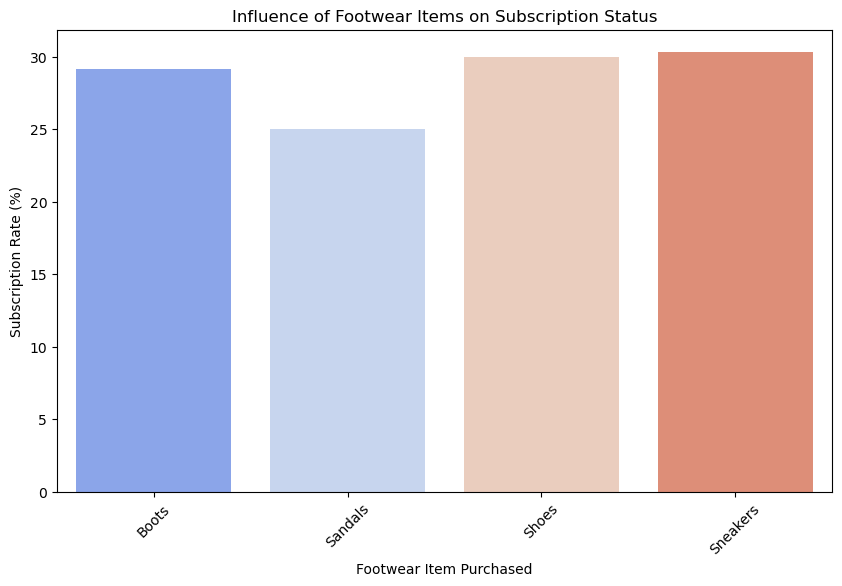

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=footwear_subscription_percentage.index, 
            y=footwear_subscription_percentage['Yes'], 
            hue=footwear_subscription_percentage.index, 
            palette='coolwarm', 
            legend=False)

plt.title('Influence of Footwear Items on Subscription Status')
plt.xlabel('Footwear Item Purchased')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.show()

## 2.4  "Purchase Amount" và "Subscription Status" 

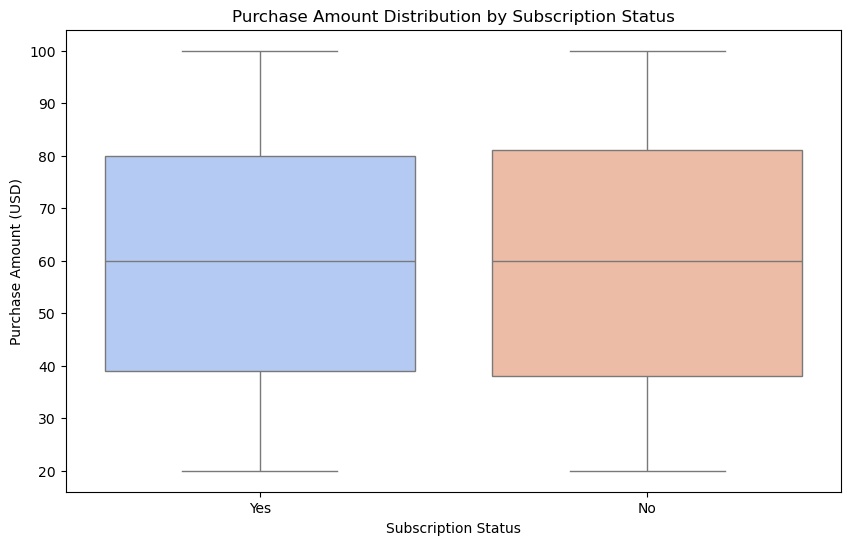

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', 
            data=df, hue='Subscription Status', palette='coolwarm', legend=False)

plt.title('Purchase Amount Distribution by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show() 

-> Không có sự khác biệt rõ rệt, chúng ta có thể suy ra rằng Purchase Amount không có ảnh hưởng đến Subscription Status.

In [17]:
# Tính trung bình và độ lệch chuẩn của Purchase Amount theo Subscription Status
purchase_amount_stats = df.groupby('Subscription Status')['Purchase Amount (USD)'].agg(['mean', 'std'])
print(purchase_amount_stats)


                          mean        std
Subscription Status                      
No                   59.865121  23.775199
Yes                  59.491928  23.449914


-> Giá trị trung bình của Purchase Amount ở nhóm không đăng ký (No) là khoảng 59.87 USD, và ở nhóm đăng ký (Yes) là khoảng 59.49 USD. Sự chênh lệch này rất nhỏ (chỉ khoảng 0.37 USD), nên có thể nói rằng mức chi tiêu trung bình giữa hai nhóm khách hàng không có sự khác biệt đáng kể.

-> Độ lệch chuẩn (standard deviation) cho cả hai nhóm là tương tự nhau (khoảng 23.77 cho nhóm "No" và 23.45 cho nhóm "Yes"), cho thấy sự phân tán của dữ liệu là tương đương giữa hai nhóm.

In [18]:
# Import thư viện để tính hệ số tương quan point-biserial
from scipy.stats import pointbiserialr
# Tính hệ số tương quan point-biserial giữa Purchase Amount và Subscription Status
correlation, p_value = pointbiserialr(df['Purchase Amount (USD)'], df['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0))

print(f'Correlation between Purchase Amount and Subscription Status: {correlation}, p-value: {p_value}')

Correlation between Purchase Amount and Subscription Status: -0.006996040561289898, p-value: 0.6622796924526275


-> Hệ số tương quan point-biserial là -0.00699, cho thấy không có mối quan hệ đáng kể giữa Purchase Amount và Subscription Status. Giá trị rất nhỏ gần bằng 0 cho thấy rằng sự chi tiêu của khách hàng không ảnh hưởng đáng kể đến việc họ có đăng ký dịch vụ hay không.

In [19]:
# Import thư viện để thực hiện t-test
from scipy.stats import ttest_ind
# Chia dữ liệu 
group_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)']
group_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)']

t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: -0.4395786253862316, p-value: 0.660292253988034


Kết quả t-test cho ra t-statistic: -0.44 và p-value: 0.66, cho thấy không có sự khác biệt có ý nghĩa thống kê giữa Purchase Amount của nhóm đăng ký và không đăng ký. 

Với p-value lớn hơn 0.05, chúng ta không thể bác bỏ giả thuyết rằng hai nhóm có mức chi tiêu tương đương.

In [17]:
# Import thư viện để thực hiện t-test
from scipy.stats import ttest_ind
# Chia dữ liệu 
group_yes = df[df['Subscription Status'] == 'Yes']['Previous Purchases']
group_no = df[df['Subscription Status'] == 'No']['Previous Purchases']

t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 1.9533719191794576, p-value: 0.050919957531247007


In [20]:
# Import thư viện để thực hiện t-test
from scipy.stats import ttest_ind
# Chia dữ liệu 
group_yes = df[df['Subscription Status'] == 'Yes']['Review Rating']
group_no = df[df['Subscription Status'] == 'No']['Review Rating']

t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: -0.3970059234213549, p-value: 0.6914083059838173


## 2.4.1. Season/Purchase Amount and "Subscription Status"

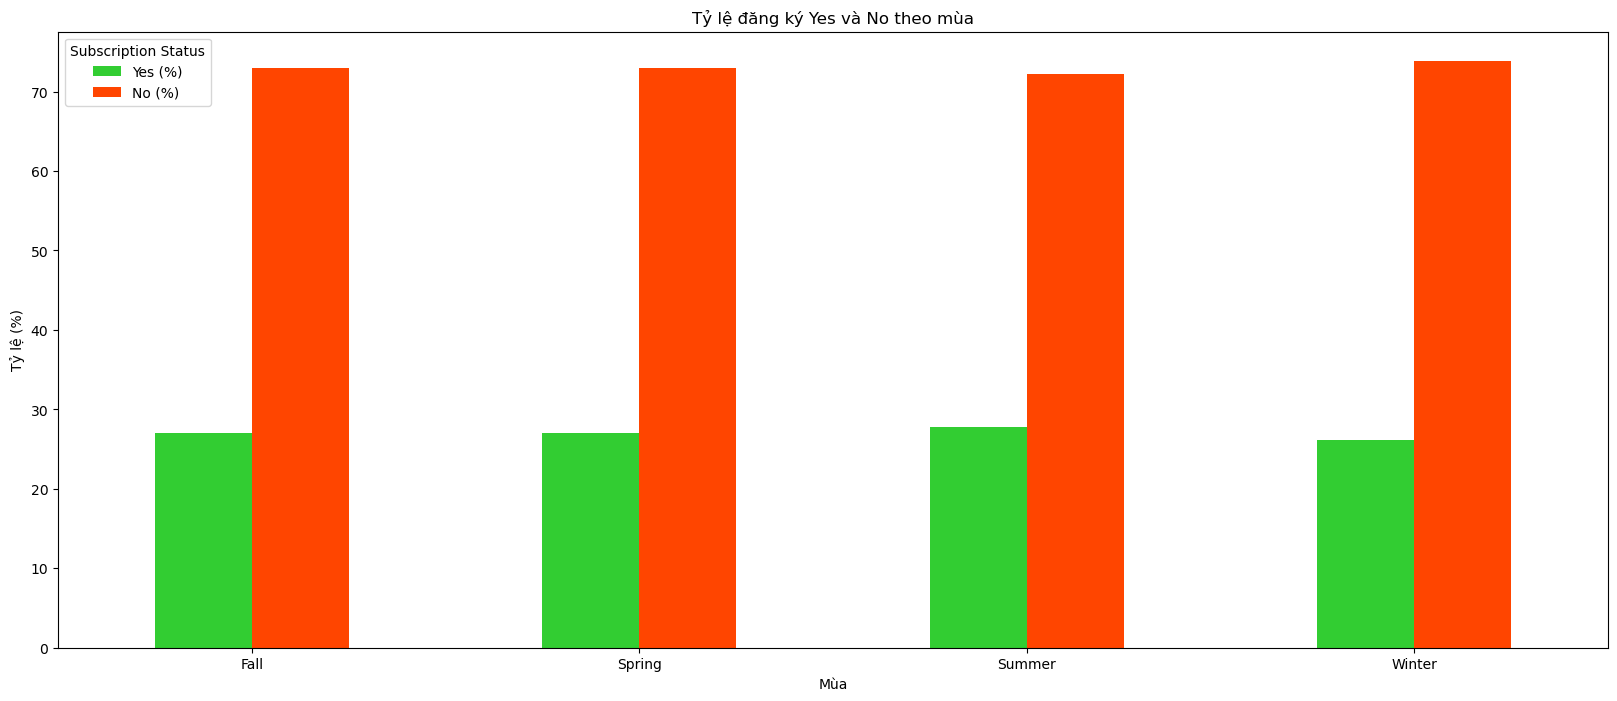

In [7]:

season_subscription = df.groupby(['Season', 'Subscription Status']).size().unstack(fill_value=0)
season_subscription['Total'] = season_subscription['Yes'] + season_subscription['No']

season_subscription['Yes (%)'] = (season_subscription['Yes'] / season_subscription['Total']) * 100
season_subscription['No (%)'] = (season_subscription['No'] / season_subscription['Total']) * 100

ax = season_subscription[['Yes (%)', 'No (%)']].plot(kind='bar', 
                                                     stacked=False, 
                                                     color=['#32CD32', '#FF4500'], 
                                                     figsize=(20,8))
plt.title('Tỷ lệ đăng ký Yes và No theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=0)

plt.show()

In [3]:
from scipy.stats import chi2_contingency
season_subscription_table = pd.crosstab(df['Season'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(season_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 0.6236617967858865, p-value: 0.8909948193353037


-> p-value lớn hơn 0.05 (ngưỡng ý nghĩa thống kê thường dùng), cụ thể là 0.891, cho thấy rằng không có bằng chứng thống kê để khẳng định rằng có mối liên hệ giữa Season và Subscription Status.
Nói cách khác, các mùa khác nhau không có ảnh hưởng đáng kể đến việc khách hàng có đăng ký dịch vụ hay không.

In [18]:
from scipy.stats import chi2_contingency
frequency_subscription_table = pd.crosstab(df['Frequency of Purchases'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(frequency_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 3.8946563289521987, p-value: 0.6909297922870219


In [19]:
from scipy.stats import chi2_contingency
pmmt_subscription_table = pd.crosstab(df['Payment Method'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(pmmt_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 2.6055935917437436, p-value: 0.7605152075982343


In [21]:
from scipy.stats import chi2_contingency
ctgr_subscription_table = pd.crosstab(df['Category'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(ctgr_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 1.344404607102478, p-value: 0.7186167320249088


In [22]:
from scipy.stats import chi2_contingency
lct_subscription_table = pd.crosstab(df['Location'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(lct_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 42.414274152270714, p-value: 0.7354729463473549


In [5]:
from scipy.stats import chi2_contingency
category_subscription_table = pd.crosstab(df['Category'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(category_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 1.344404607102478, p-value: 0.7186167320249088


In [6]:
from scipy.stats import chi2_contingency
shippingtype_subscription_table = pd.crosstab(df['Shipping Type'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(shippingtype_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 6.300602351974799, p-value: 0.27805797565678847


In [7]:
from scipy.stats import chi2_contingency
discountapplied_subscription_table = pd.crosstab(df['Discount Applied'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(discountapplied_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 1908.9213651509538, p-value: 0.0


In [8]:
from scipy.stats import chi2_contingency
promocodeused_subscription_table = pd.crosstab(df['Promo Code Used'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(promocodeused_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 1908.9213651509538, p-value: 0.0


In [4]:
from scipy.stats import chi2_contingency
gender_subscription_table = pd.crosstab(df['Gender'], df['Subscription Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(gender_subscription_table)
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')

Chi-square statistic: 676.7944035612919, p-value: 3.3268630006040623e-149


## 2.5."Review rating" and "Subscription Status"

In [8]:
print(df[['Review Rating', 'Subscription Status']].head())

   Review Rating Subscription Status
0            3.1                 Yes
1            3.1                 Yes
2            3.1                 Yes
3            3.5                 Yes
4            2.7                 Yes


In [9]:
print(df.groupby('Subscription Status')['Review Rating'].describe())

                      count      mean       std  min  25%  50%  75%  max
Subscription Status                                                     
No                   2847.0  3.752722  0.715680  2.5  3.1  3.8  4.4  5.0
Yes                  1053.0  3.742450  0.717974  2.5  3.1  3.7  4.4  5.0


In [27]:
from scipy.stats import ttest_ind

review_yes = df[df['Subscription Status'] == 'Yes']['Review Rating']
review_no = df[df['Subscription Status'] == 'No']['Review Rating']

t_stat, p_value = ttest_ind(review_yes, review_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -0.39759093978742127, P-value: 0.6909535107423552


-> Kết quả của kiểm định t-test với T-statistic = -0.40 và P-value = 0.69 cho thấy:

T-statistic có giá trị âm, điều này chỉ ra rằng trung bình của Review Rating cho những người có Subscription Status = 'Yes' có xu hướng thấp hơn một chút so với những người có Subscription Status = 'No'. Tuy nhiên, giá trị T-statistic này khá nhỏ, cho thấy sự khác biệt giữa hai nhóm không đáng kể.

P-value = 0.69, lớn hơn 0.05, nghĩa là chúng ta không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai nhóm Subscription Status về mặt Review Rating.

In [16]:
from scipy.stats import ttest_ind

review_yes = df[df['Subscription Status'] == 'Yes']['Age']
review_no = df[df['Subscription Status'] == 'No']['Age']

t_stat, p_value = ttest_ind(review_yes, review_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 0.4053077788567848, P-value: 0.6852735321521746


In [15]:
df['Review Group'] = pd.cut(df['Review Rating'], bins=[2, 3, 4, 5], 
                            labels=['Low (2 - 3)', 'Medium (3 - 4)', 'High (4 - 5)'])
print(df[['Review Rating', 'Review Group']].head())

   Review Rating    Review Group
0            3.1  Medium (3 - 4)
1            3.1  Medium (3 - 4)
2            3.1  Medium (3 - 4)
3            3.5  Medium (3 - 4)
4            2.7     Low (2 - 3)


In [16]:
review_group_status = df.groupby(['Review Group', 'Subscription Status'], observed=True).size().unstack()

print(review_group_status)

Subscription Status    No  Yes
Review Group                  
Low (2 - 3)           618  229
Medium (3 - 4)       1163  427
High (4 - 5)         1066  397


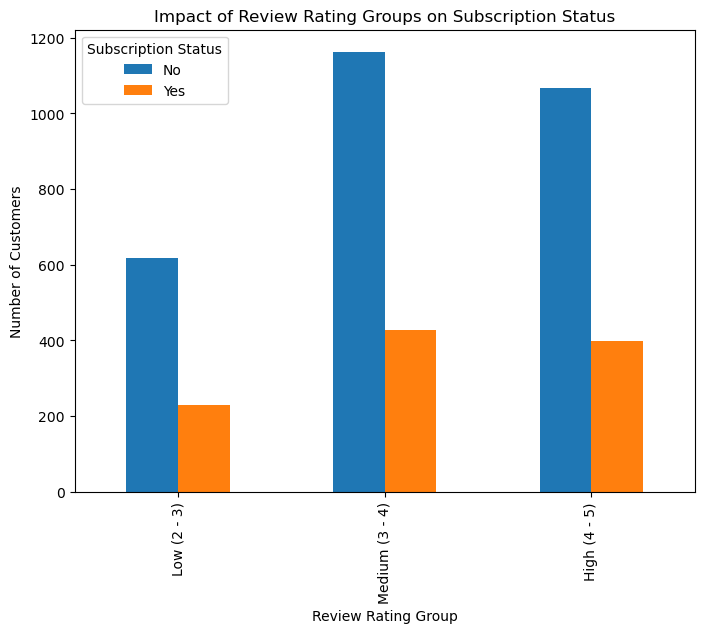

In [17]:
review_group_status.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Impact of Review Rating Groups on Subscription Status')
plt.xlabel('Review Rating Group')
plt.ylabel('Number of Customers')
plt.show()

In [56]:
review_group_status_percent = review_group_status.div(review_group_status.sum(axis=1), axis=0) * 100
print(review_group_status_percent)

Subscription Status         No        Yes
Review Group                             
Low (2 - 3)          72.963400  27.036600
Medium (3 - 4)       73.144654  26.855346
High (4 - 5)         72.863978  27.136022


-> Tỷ lệ không đăng ký vẫn rất cao ở cả ba nhóm, dao động quanh mức 72-73%, cho thấy nhiều khách hàng vẫn quyết định không đăng ký dịch vụ, bất kể đánh giá của họ về sản phẩm.
-> Khách hàng đánh giá cao có xu hướng đăng ký nhiều hơn (tỷ lệ đăng ký cao nhất là 27.14% trong nhóm High), cho thấy rằng đánh giá tích cực có ảnh hưởng nhất định đến quyết định đăng ký, nhưng tác động này chưa đủ lớn để thay đổi rõ rệt tỷ lệ tổng thể.

## 2.6. Payment method/Prefered Payment Method and  "Subscription Status"

In [40]:
print(df[['Payment Method', 'Preferred Payment Method', 'Subscription Status']].head())

  Payment Method Preferred Payment Method Subscription Status
0    Credit Card                    Venmo                 Yes
1  Bank Transfer                     Cash                 Yes
2           Cash              Credit Card                 Yes
3         PayPal                   PayPal                 Yes
4           Cash                   PayPal                 Yes


In [41]:
df['Payment Match'] = df['Payment Method'] == df['Preferred Payment Method']
print(df[['Payment Method', 'Preferred Payment Method', 'Payment Match']].head())

  Payment Method Preferred Payment Method  Payment Match
0    Credit Card                    Venmo          False
1  Bank Transfer                     Cash          False
2           Cash              Credit Card          False
3         PayPal                   PayPal           True
4           Cash                   PayPal          False


In [42]:
match_status = df.groupby(['Payment Match', 'Subscription Status']).size().unstack()
print(match_status)

Subscription Status    No  Yes
Payment Match                 
False                2405  878
True                  442  175


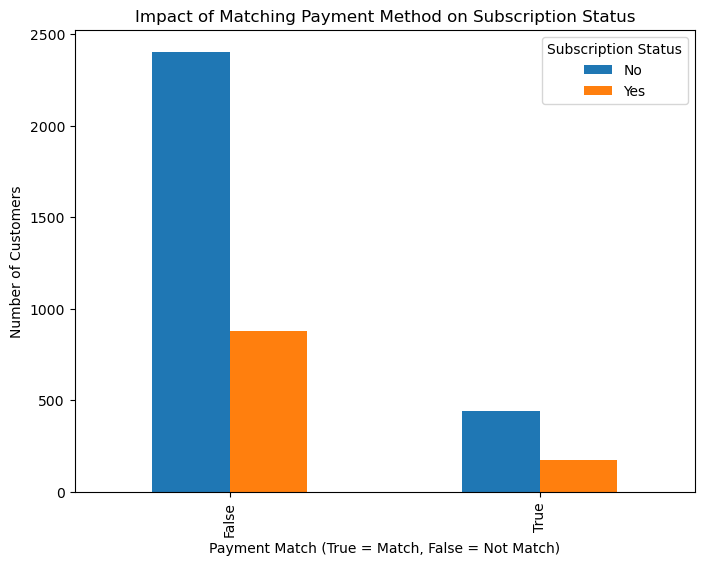

In [25]:
match_status.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Impact of Matching Payment Method on Subscription Status')
plt.xlabel('Payment Match (True = Match, False = Not Match)')
plt.ylabel('Number of Customers')
plt.show()


In [36]:
match_status_percent = match_status.div(match_status.sum(axis=1), axis=0) * 100
print(match_status_percent)

Subscription Status         No        Yes
Payment Match                            
False                73.256168  26.743832
True                 71.636953  28.363047


-> Tỷ lệ khách hàng đăng ký (Subscription Status = 'Yes') cao hơn một chút khi Payment Method trùng với Preferred Payment Method (28.36% so với 26.74%).
Tuy nhiên, sự khác biệt này không quá lớn, chỉ khoảng 1.6%.

->Mặc dù có sự khác biệt nhỏ, việc khách hàng chọn cùng một phương thức thanh toán cho cả Payment Method và Preferred Payment Method chỉ ảnh hưởng nhẹ đến khả năng họ đăng ký. Điều này cho thấy rằng sự trùng khớp giữa hai phương thức này có thể là một yếu tố, nhưng không phải là yếu tố quyết định mạnh mẽ đến việc khách hàng có đăng ký hay không. 

## 2.7. "Shipping type" and "Subscription Status" 

In [26]:
print(df[['Shipping Type', 'Subscription Status']].head())

   Shipping Type Subscription Status
0        Express                 Yes
1        Express                 Yes
2  Free Shipping                 Yes
3   Next Day Air                 Yes
4  Free Shipping                 Yes


In [27]:
shipping_status = df.groupby(['Shipping Type', 'Subscription Status']).size().unstack()
print(shipping_status)

Subscription Status   No  Yes
Shipping Type                
2-Day Shipping       474  153
Express              456  190
Free Shipping        498  177
Next Day Air         480  168
Standard             479  175
Store Pickup         460  190


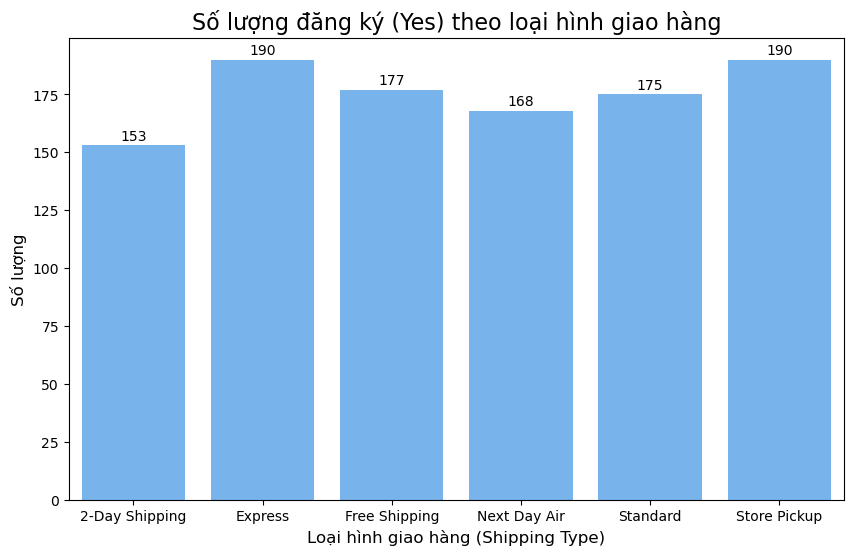

In [61]:
yes_df = df[df['Subscription Status'] == 'Yes']

yes_count = yes_df.groupby('Shipping Type').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x='Shipping Type', y='Count', data=yes_count, color='#66b3ff')

plt.title('Số lượng đăng ký (Yes) theo loại hình giao hàng', fontsize=16)
plt.xlabel('Loại hình giao hàng (Shipping Type)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

for index, value in enumerate(yes_count['Count']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


In [40]:
shipping_status_percent = shipping_status.div(shipping_status.sum(axis=1), axis=0) * 100
print(shipping_status_percent)

Subscription Status         No        Yes
Shipping Type                            
2-Day Shipping       75.598086  24.401914
Express              70.588235  29.411765
Free Shipping        73.777778  26.222222
Next Day Air         74.074074  25.925926
Standard             73.241590  26.758410
Store Pickup         70.769231  29.230769


-> Các phương thức vận chuyển như Express và Store Pickup có tỷ lệ khách hàng đăng ký cao hơn (gần 29%).

Ngược lại, 2-Day Shipping có tỷ lệ khách hàng đăng ký thấp nhất (24.40%), cho thấy phương thức này ít ảnh hưởng tích cực đến việc đăng ký.

Free Shipping, Standard, và Next Day Air có tỷ lệ khách hàng đăng ký ở mức trung bình, từ 25.93% đến 26.76%, không có sự khác biệt lớn.

-> Express Shipping và Store Pickup dường như có ảnh hưởng tích cực đến tỷ lệ đăng ký cao hơn so với các phương thức vận chuyển khác. Những khách hàng chọn hai phương thức này có khả năng đăng ký cao hơn khoảng 3-5% so với các phương thức khác.
2-Day Shipping có tỷ lệ đăng ký thấp hơn, cho thấy có thể phương thức này không được khách hàng ưa chuộng khi quyết định đăng ký.

-> Đề xuất tối ưu hóa các phương thức vận chuyển như Express hoặc Store Pickup để tăng tỷ lệ đăng ký

## 2.8. Discount Applied/Promo code Used and " Subcription Status" 

In [41]:
print(df[['Discount Applied', 'Promo Code Used', 'Subscription Status']].head())

  Discount Applied Promo Code Used Subscription Status
0              Yes             Yes                 Yes
1              Yes             Yes                 Yes
2              Yes             Yes                 Yes
3              Yes             Yes                 Yes
4              Yes             Yes                 Yes


In [29]:
discount_status = df.groupby(['Discount Applied', 'Subscription Status']).size().unstack()
print(discount_status)

Subscription Status      No     Yes
Discount Applied                   
No                   2223.0     NaN
Yes                   624.0  1053.0


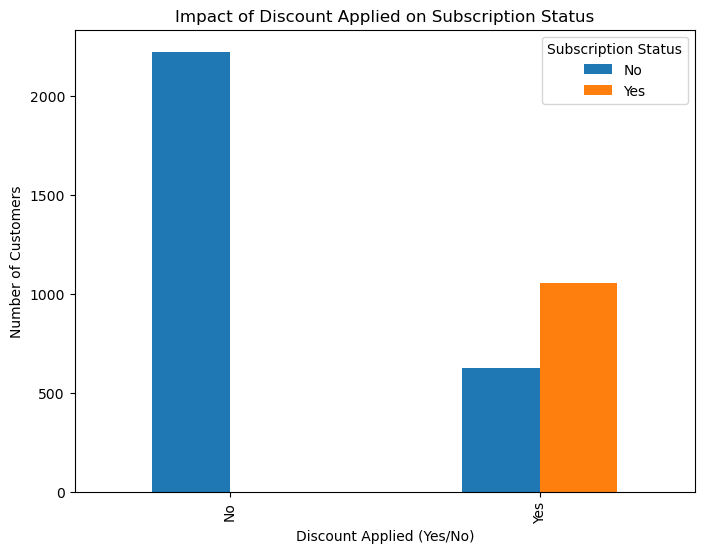

In [30]:
discount_status.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Impact of Discount Applied on Subscription Status')
plt.xlabel('Discount Applied (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()

In [44]:
discount_status_percent = discount_status.div(discount_status.sum(axis=1), axis=0) * 100
print(discount_status_percent)

Subscription Status          No        Yes
Discount Applied                          
No                   100.000000        NaN
Yes                   37.209302  62.790698


In [31]:
promo_status = df.groupby(['Promo Code Used', 'Subscription Status']).size().unstack()
print(promo_status)

Subscription Status      No     Yes
Promo Code Used                    
No                   2223.0     NaN
Yes                   624.0  1053.0


-> Tác động mạnh mẽ của giảm giá: Kết quả cho thấy rằng việc áp dụng giảm giá làm tăng khả năng đăng ký lên đến 62.79%, cho thấy khách hàng rất nhạy cảm với ưu đãi giảm giá.

Không có ưu đãi = Không có đăng ký: Tình trạng không có giảm giá dẫn đến tỷ lệ đăng ký bằng 0, điều này cho thấy rằng khách hàng có thể không thấy đủ động lực để đăng ký khi không có ưu đãi.

Kết luận:
Giảm giá là một yếu tố quan trọng và hiệu quả trong việc thu hút khách hàng đăng ký.
Chiến lược sử dụng ưu đãi giảm giá trong các chương trình khuyến mãi có thể tạo ra động lực lớn cho khách hàng.
Đề xuất:
Dựa trên phân tích trên, đây là một số đề xuất:

Tăng cường các chương trình giảm giá và đưa ra các chiến dịch marketing để thông báo cho khách hàng về các ưu đãi này.

Theo dõi phản hồi của khách hàng và điều chỉnh các ưu đãi để tối ưu hóa tỷ lệ đăng ký.

Kết hợp giảm giá với các yếu tố khác như dịch vụ khách hàng tốt hơn hoặc sản phẩm chất lượng cao để tăng cường sự hấp dẫn cho khách hàng.

Các chiến lược này có thể giúp nâng cao tỷ lệ chuyển đổi và tạo động lực cho khách hàng trong việc đăng ký dịch vụ.

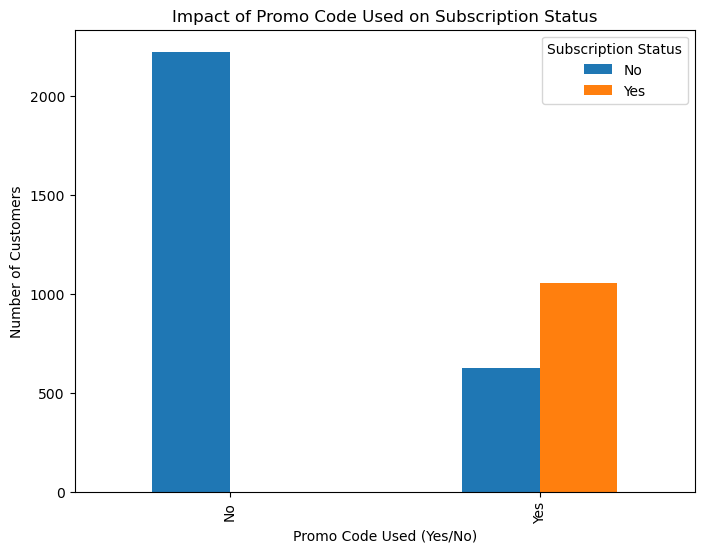

In [32]:
promo_status.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Impact of Promo Code Used on Subscription Status')
plt.xlabel('Promo Code Used (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()

In [33]:
promo_status_percent = promo_status.div(promo_status.sum(axis=1), axis=0) * 100
print(promo_status_percent)

Subscription Status          No        Yes
Promo Code Used                           
No                   100.000000        NaN
Yes                   37.209302  62.790698


-> Kết quả giống nhau 100% cho 2 yếu tố " Discount Applied" và "Promo Code Used" ảnh hưởng đến" Subscription Status" 

-> Cả Discount Applied và Promo Code Used đều có tác động lớn đến khả năng đăng ký của khách hàng, điều này cho thấy rằng việc áp dụng các chiến lược ưu đãi sẽ là một yếu tố quan trọng trong việc tăng cường tỷ lệ chuyển đổi và tạo động lực cho khách hàng đăng ký.

## 2.9 Previous Purchases/Frequence of Purchase and "Subcription Status"

In [48]:
df['Previous Purchases'].unique()

array([14,  2, 23, 49, 31, 19,  8,  4, 26, 10, 37, 34, 44, 36, 17, 46, 50,
       22, 32, 40, 16, 13,  7, 41, 45, 38, 48, 18, 15, 25, 39, 35, 29, 21,
       43,  3,  5, 24, 42, 47, 28, 20, 33,  1,  9, 12, 27, 11, 30,  6],
      dtype=int64)

In [49]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [35]:
# Tạo các nhóm cho Previous Purchases
bins_previous = [0, 10, 20, 30, 40, float('inf')]
labels_previous = ['1-10 Purchases', '11-20 Purchases', '21-30 Purchases', '31-40 Purchases', '41+ Purchases']
df['Previous Purchases Group'] = pd.cut(df['Previous Purchases'], bins=bins_previous, labels=labels_previous)


In [36]:
frequency_bins = {
    'Rarely': ['Annually', 'Every 3 Months'],
    'Occasionally': ['Quarterly', 'Bi-Weekly', 'Monthly'],
    'Frequently': ['Fortnightly', 'Weekly']
}

def categorize_frequency(frequency):
    for group, values in frequency_bins.items():
        if frequency in values:
            return group
    return 'Unknown'

df['Frequency Group'] = df['Frequency of Purchases'].apply(categorize_frequency)

In [37]:
result_combined = df.groupby(['Previous Purchases Group', 'Frequency Group', 'Subscription Status'], observed=True).size().unstack(fill_value=0)
result_combined_percentage = result_combined.div(result_combined.sum(axis=1), axis=0) * 100

print(result_combined_percentage)

Subscription Status                              No        Yes
Previous Purchases Group Frequency Group                      
1-10 Purchases           Frequently       76.605505  23.394495
                         Occasionally     75.776398  24.223602
                         Rarely           77.459016  22.540984
11-20 Purchases          Frequently       71.144279  28.855721
                         Occasionally     75.692308  24.307692
                         Rarely           71.713147  28.286853
21-30 Purchases          Frequently       69.266055  30.733945
                         Occasionally     73.255814  26.744186
                         Rarely           71.929825  28.070175
31-40 Purchases          Frequently       68.240343  31.759657
                         Occasionally     72.023810  27.976190
                         Rarely           70.697674  29.302326
41+ Purchases            Frequently       71.563981  28.436019
                         Occasionally     74.404762  25

-> Nhóm 1-10 Purchases:

Tần suất mua hàng:
Frequently: 23.39% đăng ký
Occasionally: 24.22% đăng ký
Rarely: 22.54% đăng ký
Nhận xét: Nhóm này có tỷ lệ đăng ký không cao, nhưng nhóm mua hàng Occasionally có tỷ lệ đăng ký cao nhất trong nhóm này.

-> Nhóm 11-20 Purchases:

Tần suất mua hàng:
Frequently: 28.86% đăng ký
Occasionally: 24.31% đăng ký
Rarely: 28.29% đăng ký
Nhận xét: Nhóm này có sự gia tăng đáng kể về tỷ lệ đăng ký ở cả hai nhóm Frequently và Rarely. Điều này cho thấy rằng những khách hàng đã có từ 11 đến 20 lần mua hàng có xu hướng đăng ký nhiều hơn.

-> Nhóm 21-30 Purchases:

Tần suất mua hàng:
Frequently: 30.73% đăng ký
Occasionally: 26.74% đăng ký
Rarely: 28.07% đăng ký
Nhận xét: Đây là nhóm có tỷ lệ đăng ký cao nhất cho nhóm Frequently so với các nhóm trước đó.

-> Nhóm 31-40 Purchases:

Tần suất mua hàng:
Frequently: 31.76% đăng ký
Occasionally: 27.98% đăng ký
Rarely: 29.30% đăng ký
Nhận xét: Tỷ lệ đăng ký tiếp tục tăng, đặc biệt ở nhóm Frequently.

-> Nhóm 41+ Purchases:

Tần suất mua hàng:
Frequently: 28.44% đăng ký
Occasionally: 25.60% đăng ký
Rarely: 27.98% đăng ký
Nhận xét: Tỷ lệ đăng ký ở nhóm này thấp hơn so với nhóm trước, nhưng vẫn duy trì mức độ cao hơn 25%.

===> Tổng quát: Sự gia tăng trong số lần mua hàng trước đó dường như có mối liên hệ tích cực với tỷ lệ đăng ký. Các khách hàng đã thực hiện nhiều giao dịch hơn có xu hướng đăng ký cao hơn, đặc biệt là trong các nhóm tần suất mua hàng thường xuyên.

Tần suất Mua hàng: Khách hàng có tần suất mua hàng Frequently có tỷ lệ đăng ký cao hơn so với các nhóm Occasionally và Rarely. Điều này cho thấy rằng các khách hàng thường xuyên quay lại có nhiều khả năng đăng ký hơn.

## 2.10. Location and Subscription Status 

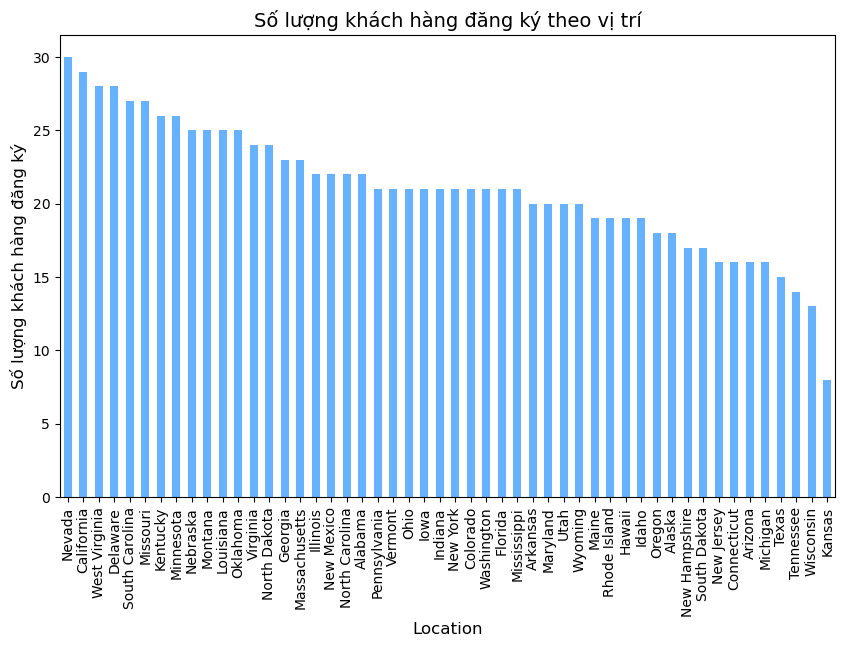

In [48]:
df_yes = df[df['Subscription Status'] == 'Yes']

subscription_by_location = df_yes['Location'].value_counts()

plt.figure(figsize=(10, 6))
subscription_by_location.plot(kind='bar', color='#66B2FF')

plt.title('Số lượng khách hàng đăng ký theo vị trí', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Số lượng khách hàng đăng ký', fontsize=12)

plt.show()

# 3. Modeling 

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Giả sử X_train và y_train đã được chuẩn bị với các cột cần thiết

# Tạo một pipeline với tiền xử lý và mô hình
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), ['Age']),
            ('cat', OneHotEncoder(), ['Gender', 'Promo Code Used', 'Discount Applied'])
        ])),
    ('classifier', LogisticRegression())
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[422 136]
 [  0 222]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780



True Negatives (TN): 422 - Số khách hàng không đăng ký mà mô hình dự đoán đúng.
False Positives (FP): 136 - Số khách hàng không đăng ký nhưng mô hình dự đoán sai là đã đăng ký.
False Negatives (FN): 0 - Không có khách hàng nào đã đăng ký mà bị mô hình dự đoán sai là không đăng ký.
True Positives (TP): 222 - Số khách hàng đã đăng ký mà mô hình dự đoán đúng.

Phân Tích Kết Quả
Precision:

    Lớp 0 (Không đăng ký): 1.00 - Độ chính xác hoàn hảo. Tất cả khách hàng được dự đoán không đăng ký thực sự không đăng ký.
    Lớp 1 (Đăng ký): 0.62 - Độ chính xác không cao. Chỉ 62% khách hàng được dự đoán đã đăng ký thực sự đã đăng ký.
Recall:

    Lớp 0: 0.76 - Tỷ lệ phát hiện đúng khách hàng không đăng ký. Điều này có nghĩa là mô hình bỏ sót 24% khách hàng không đăng ký.
    Lớp 1: 1.00 - Mô hình phát hiện 100% khách hàng đã đăng ký. Đây là một kết quả rất tốt.

F1-score:
    Lớp 0: 0.86 - Điểm F1 tốt, cho thấy sự cân bằng giữa độ chính xác và độ nhạy.
    Lớp 1: 0.77 - Mặc dù tốt nhưng vẫn có thể cải thiện.

Accuracy: 0.83 - Tổng độ chính xác là 83%, cho thấy mô hình có khả năng phân loại khá tốt nhưng vẫn cần cải thiện cho lớp đã đăng ký.

Macro Average:

Precision: 0.81 - Tính trung bình độ chính xác của hai lớp.
Recall: 0.88 - Tính trung bình tỷ lệ phát hiện đúng của hai lớp.
F1-score: 0.81 - Điểm F1 trung bình.

Weighted Average:

    Precision: 0.89 - Độ chính xác trung bình có trọng số, tính đến số lượng mẫu trong từng lớp.
    Recall: 0.83 - Tương tự như trên, nhưng dựa trên số lượng mẫu.
    F1-score: 0.83 - Điểm F1 trung bình có trọng số.
    
Nhận Xét Chung
Mô hình Logistic Regression đã hoạt động tốt với khả năng phát hiện khách hàng đã đăng ký (Recall = 1.00), nhưng gặp khó khăn trong việc dự đoán khách hàng không đăng ký (Precision = 0.62).
Điều này cho thấy mô hình có thể thiên lệch hơn về lớp đăng ký, dẫn đến nhiều khách hàng không đăng ký bị dự đoán sai.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Giả sử X_train và y_train đã được chuẩn bị với các cột cần thiết

# Tạo một pipeline với tiền xử lý và mô hình Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), ['Age']),
            ('cat', OneHotEncoder(), ['Gender', 'Promo Code Used', 'Discount Applied'])
        ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[435 123]
 [ 18 204]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       558
           1       0.62      0.92      0.74       222

    accuracy                           0.82       780
   macro avg       0.79      0.85      0.80       780
weighted avg       0.86      0.82      0.83       780



True Negatives (TN): 435 - Số khách hàng không đăng ký mà mô hình dự đoán đúng.
False Positives (FP): 123 - Số khách hàng không đăng ký nhưng mô hình dự đoán sai là đã đăng ký.
False Negatives (FN): 18 - Số khách hàng đã đăng ký nhưng bị mô hình dự đoán sai là không đăng ký.
True Positives (TP): 204 - Số khách hàng đã đăng ký mà mô hình dự đoán đúng.

Phân Tích Kết Quả
Precision:

    Lớp 0 (Không đăng ký): 0.96 - Độ chính xác cao. Gần như tất cả khách hàng được dự đoán không đăng ký thực sự không đăng ký.
    Lớp 1 (Đăng ký): 0.62 - Độ chính xác không cao. Chỉ 62% khách hàng được dự đoán đã đăng ký thực sự đã đăng ký.

Recall:

    Lớp 0: 0.78 - Tỷ lệ phát hiện đúng khách hàng không đăng ký. Điều này có nghĩa là mô hình bỏ sót 22% khách hàng không đăng ký.
    Lớp 1: 0.92 - Mô hình phát hiện 92% khách hàng đã đăng ký. Đây là kết quả tốt.

F1-score:
    Lớp 0: 0.86 - Điểm F1 tốt, cho thấy sự cân bằng giữa độ chính xác và độ nhạy.
    Lớp 1: 0.74 - Mặc dù không quá cao, nhưng vẫn chấp nhận được.
    Accuracy: 0.82 - Tổng độ chính xác là 82%, cho thấy mô hình có khả năng phân loại khá tốt.

Macro Average:

    Precision: 0.79 - Tính trung bình độ chính xác của hai lớp.
    Recall: 0.85 - Tính trung bình tỷ lệ phát hiện đúng của hai lớp.
    F1-score: 0.80 - Điểm F1 trung bình.

Weighted Average:

    Precision: 0.86 - Độ chính xác trung bình có trọng số, tính đến số lượng mẫu trong từng lớp.
    Recall: 0.82 - Tương tự như trên, nhưng dựa trên số lượng mẫu.
    F1-score: 0.83 - Điểm F1 trung bình có trọng số.
Nhận Xét Chung
    Mô hình Decision Tree đã hoạt động tốt với khả năng phát hiện khách hàng đã đăng ký (Recall = 0.92), nhưng gặp khó khăn trong việc dự đoán khách hàng không đăng ký (Precision = 0.96).
    Mặc dù độ chính xác tổng thể của mô hình khá cao, nhưng độ chính xác của lớp đăng ký cần được cải thiện hơn.
    Cụ thể, số lượng False Positives (FP) là 123, cho thấy mô hình đã dự đoán sai khá nhiều khách hàng không đăng ký là đã đăng ký.

Kết Luận
Mô hình Decision Tree cung cấp kết quả khá khả quan với khả năng phát hiện tốt lớp đăng ký, nhưng có thể cải thiện độ chính xác cho lớp không đăng ký.

In [52]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Giả sử dữ liệu ban đầu đã được tải vào DataFrame df
# Kiểm tra các giá trị khác nhau của cột 'Subscription Status' để đảm bảo các giá trị phù hợp
df['Subscription Status'] = df['Subscription Status'].replace({'Yes': 1, 'No': 0})

# Chuyển đổi các cột categorical sang dạng số (one-hot encoding)
df = pd.get_dummies(df, columns=['Gender', 'Discount Applied', 'Promo Code Used'], drop_first=True)

# Chọn biến độc lập X và biến phụ thuộc y
X = df[['Gender_Male', 'Discount Applied_Yes', 'Promo Code Used_Yes', 'Previous Purchases']]
y = df['Subscription Status']  # Giá trị là 0 và 1

# Chuyển đổi y sang kiểu int nếu cần thiết
y = y.astype(int)

# Kiểm tra giá trị của y
print(y.unique())

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hàm đánh giá hiệu suất mô hình
def evaluate_model(model, X_test, y_test):
    # Dự đoán giá trị
    y_pred = model.predict(X_test)
    # Tính các chỉ số đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))

# 1. Logistic Regression
print("Logistic Regression:")
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
evaluate_model(logistic_model, X_test, y_test)

# 2. Decision Tree
print("\nDecision Tree:")
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
evaluate_model(tree_model, X_test, y_test)


[1 0]
Logistic Regression:
Accuracy: 0.83
Precision: 0.63
Recall: 1.00
F1 Score: 0.77
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       834
           1       0.63      1.00      0.77       336

    accuracy                           0.83      1170
   macro avg       0.81      0.88      0.82      1170
weighted avg       0.89      0.83      0.84      1170


Decision Tree:
Accuracy: 0.82
Precision: 0.63
Recall: 0.89
F1 Score: 0.74
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       834
           1       0.63      0.89      0.74       336

    accuracy                           0.82      1170
   macro avg       0.79      0.84      0.80      1170
weighted avg       0.86      0.82      0.83      1170

